# Model Evaluation  

In [1]:
"""Model Evaluation

Structure:
    1. Imports, Variables & Functions
    2. Load Data
    3. Evaluate Model
"""

# 1. Imports, Variables & Functions
# imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, sys, os
from tqdm import tqdm
import logging
import seaborn as sns
import h5py
import matplotlib as mpl

logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)
# variables
descriptors = [
    "b4.signaturizer3d",
    "b4.signaturizer",
    "a1.signaturizer",
    "unimol",
    "ecfp4",
    "ecfp4.useChirality",
    "mapc",
]
path_results = os.path.join("..", "output", "results")
targets_idxs = list(range(3852))
data_matrix_path = os.path.join("..", "data", "B4.001", "s0_filtered.h5")
output_plot_path = os.path.join("..", "output", "figures")
output_table_path = os.path.join("..", "output", "tables")


# functions
def get_df_data(df_results, descriptors, metric, n_actives):
    """Get DF Data
    Args:
        - df_results (pd.DataFrame): DataFrame with the results
        - descriptors (list): List of descriptors to analyze
        - metric (str): Metric to analyze
        - n_actives (int): Number of actives
    Returns:
        - data (list): List of lists with the data for each metric
    """
    data = list()
    for descriptor in descriptors:
        QUERY = "n_positives_total >= @n_actives & descriptor in @descriptor"
        _df_query = df_results.query(QUERY)
        data.append(_df_query[metric].values)

    return data

In [2]:
# 2. Load Data
df_results = pd.DataFrame()

for descriptor in descriptors:
    for target in tqdm(targets_idxs):
        path_model = os.path.join(
            path_results, descriptor, f"results.target_idx_{target}.csv"
        )
        if os.path.exists(path_model):  # Ensure the file exists before reading
            df = pd.read_csv(path_model)
            df["descriptor"] = descriptor
            df_results = pd.concat([df_results, df], ignore_index=True)
        else:
            logging.warning(f"File {path_model} does not exist.")

100%|██████████| 3852/3852 [00:12<00:00, 308.31it/s]


In [3]:
# get nº of actives per target
with h5py.File(data_matrix_path, "r") as f:
    n_actives_per_target = np.sum(f["V"][:], axis=0)

logging.info(f"Nº of targets {len(n_actives_per_target)}")

# 3. Evaluate Model

2024-05-31 10:56:26,486 - INFO - Nº of targets 3852


In [4]:
# drop a1
QUERY = "descriptor != 'a1.signaturizer'"
df_query = df_results.query(QUERY)

# replace name
df_query["descriptor"] = df_query["descriptor"].replace(
    "b4.signaturizer3d", "signaturizer3D", regex=True
)
df_query["descriptor"] = df_query["descriptor"].replace(
    "b4.signaturizer", "signaturizer", regex=True
)
df_query["descriptor"] = df_query["descriptor"].replace(
    "ecfp4.useChirality", "ChiralECFP4", regex=True
)
df_query["descriptor"] = df_query["descriptor"].replace("ecfp4", "ECFP4", regex=True)
df_query["descriptor"] = df_query["descriptor"].replace("unimol", "UniMol", regex=True)
df_query["descriptor"] = df_query["descriptor"].replace("mapc", "MAP4C", regex=True)

/tmp/ipykernel_136284/2167136319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query["descriptor"] = df_query["descriptor"].replace(
/tmp/ipykernel_136284/2167136319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query["descriptor"] = df_query["descriptor"].replace(
/tmp/ipykernel_136284/2167136319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [5]:
for i, n_actives in enumerate([5, 50, 100, 200]):

    QUERY = "n_positives_total >= @n_actives"
    df_query_actives = df_query.query(QUERY)

    df_query_actives["n_actives"] = n_actives

    if i == 0:
        df_query_actives_all = df_query_actives
    else:
        df_query_actives_all = pd.concat(
            [df_query_actives_all, df_query_actives], ignore_index=True
        )

logging.info(f"Dataframe shape {df_query_actives_all.shape}")

/tmp/ipykernel_136284/56278851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query_actives["n_actives"] = n_actives
/tmp/ipykernel_136284/56278851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query_actives["n_actives"] = n_actives
/tmp/ipykernel_136284/56278851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

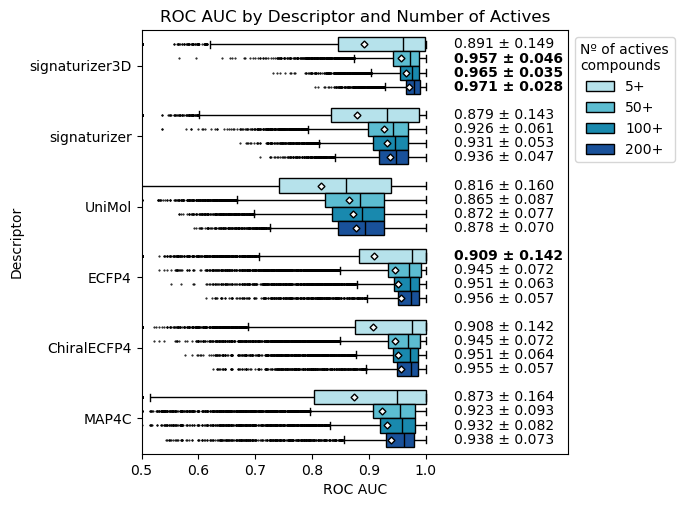

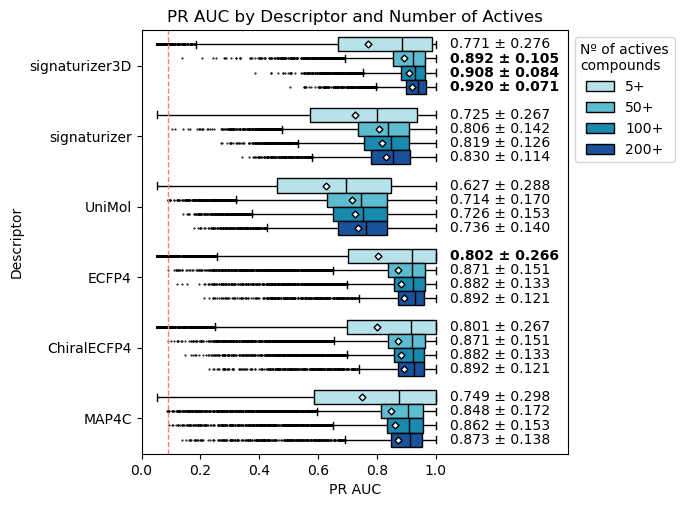

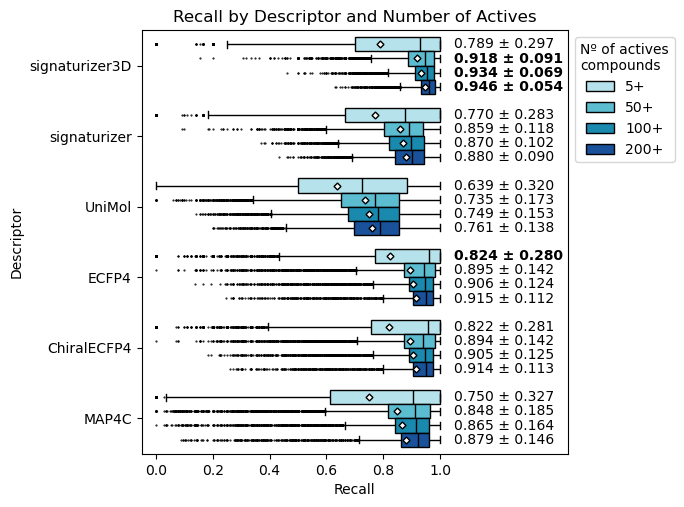

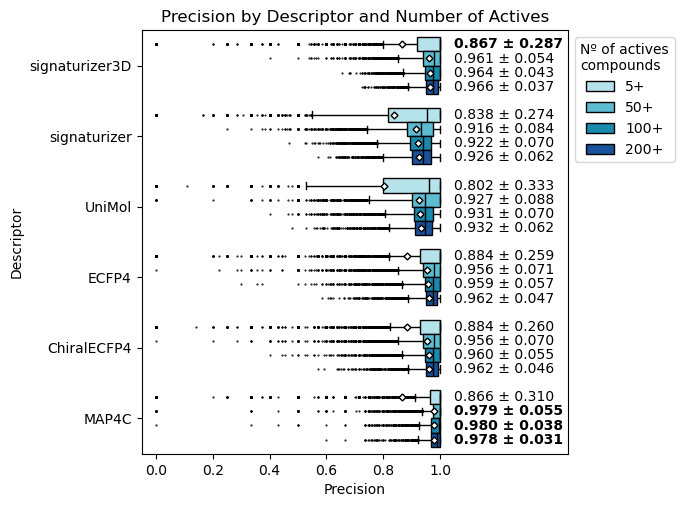

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

# Sample DataFrame
# Assuming df_query_actives_all is already defined and contains the necessary data
# If not, define df_query_actives_all here with the appropriate structure

# variables
color_palette = {5: "#B6FFFA", 50: "#98E4FF", 100: "#80B3FF", 200: "#687EFF"}
color_palette = {5: "#ADE8F4", 50: "#48CAE4", 100: "#0096C7", 200: "#034eb0"}
metric_translation = {
    "roc_auc": "ROC AUC",
    "auprc": "PR AUC",
    "recall": "Recall",
    "precision": "Precision",
}

for metric in metric_translation.keys():

    metric_name = metric_translation[metric]

    # Rotate the boxplot
    plt.figure(figsize=(5.5, 5.5))
    ax = sns.boxplot(
        data=df_query_actives_all,
        x=metric,
        y="descriptor",
        hue="n_actives",
        orient="h",
        showfliers=True,
        palette=color_palette,
        linecolor="black",
        linewidth=1,
        showmeans=True,
        meanprops={
            "marker": "D",
            "markerfacecolor": "white",
            "markeredgecolor": "black",
            "markersize": "3.5",
        },
        flierprops=dict(
            marker="o", markerfacecolor="black", markersize=0.5, linestyle="none"
        ),
    )

    # plt.scatter(means[metric], y_positions, marker='D', color='magenta', s=50, zorder=3)

    # Calculate means and standard deviations
    stats = (
        df_query_actives_all.groupby(["descriptor", "n_actives"])[metric]
        .agg(["mean", "std"])
        .reset_index()
    )

    # Determine the fixed x-coordinate (far right of the plot)
    x_max = df_query_actives_all[metric].max() + 0.05  # Adjust the offset as needed

    top_values = [4, 21, 22, 23]
    if metric == "precision":
        top_values = [9, 10, 11, 20]

    # Add mean values and standard deviations as text annotations
    for i, row in stats.iterrows():
        descriptor = row["descriptor"]
        n_actives = row["n_actives"]
        mean_val = row["mean"]
        std_val = row["std"]

        # Find the position of the boxplot
        hue_order = sorted(df_query_actives_all["n_actives"].unique())
        hue_level = hue_order.index(n_actives)
        descriptor_index = (
            df_query_actives_all["descriptor"].unique().tolist().index(descriptor)
        )

        # Calculate the y position for the text
        y_pos = (
            descriptor_index
            + hue_level / (len(hue_order) + 1)
            + 0.5 / (len(hue_order) + 1)
            - 0.40
        )

        # Plot the mean value and standard deviation text
        if i in top_values:
            ax.text(
                x_max,
                y_pos,
                f"{mean_val:.3f} ± {std_val:.3f}",
                color="black",
                ha="left",
                va="center",
                fontweight="bold",
            )
        else:
            ax.text(
                x_max,
                y_pos,
                f"{mean_val:.3f} ± {std_val:.3f}",
                color="black",
                ha="left",
                va="center",
            )

    # Move the legend outside the plot and rename labels
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [f"{label}+" for label in labels]
    legend = ax.legend(
        handles,
        new_labels,
        title="Nº of actives\ncompounds",
        bbox_to_anchor=(1, 1),
        loc="upper left",
    )
    plt.title(f"{metric_name} by Descriptor and Number of Actives")
    plt.xlabel(f"{metric_name}")
    plt.ylabel("Descriptor")

    if metric in ["roc_auc"]:
        plt.xlim(0.5, 1.25)
        # ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
    elif metric == "auprc":
        random = df_query_actives_all["random_auprc"].mean()
        ax.axvline(x=random, color="salmon", linestyle="--", linewidth=1)
        plt.xlim(right=1.45)  # Adjust x-axis limit to make space for annotations
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    else:
        plt.xlim(right=1.45)  # Adjust x-axis limit to make space for annotations
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.savefig(
        os.path.join(output_plot_path, f"boxplot_{metric}.png"),
        dpi=300,
        bbox_inches="tight",
    )

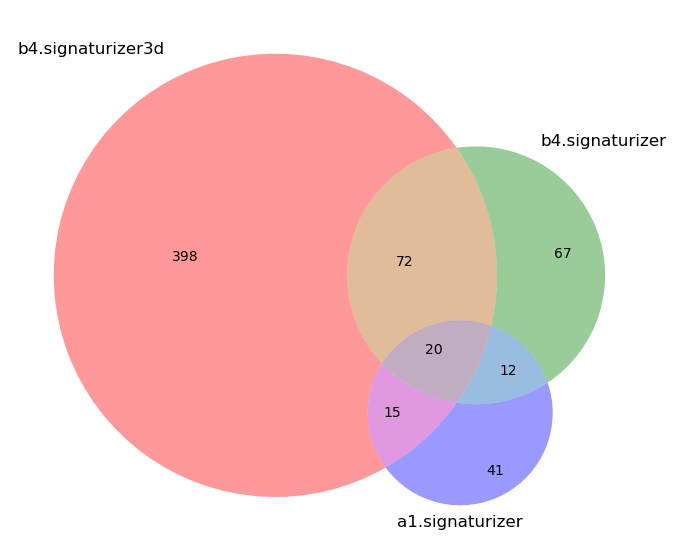

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from collections import defaultdict
from matplotlib_venn import venn2

# Assuming df_results is already loaded

# Step 1: Calculate the mean recall for each target index within each descriptor
df_mean_recall = (
    df_results.groupby(["descriptor", "target_idx"])["auprc"].mean().reset_index()
)

# Step 2: Extract the top 100 targets based on the mean recall for each descriptor
top_targets = defaultdict(list)

for descriptor in descriptors:
    descriptor_data = df_mean_recall[df_mean_recall["descriptor"] == descriptor]
    top_targets[descriptor] = descriptor_data[descriptor_data["auprc"] > 0.95][
        "target_idx"
    ].tolist()


# Step 3: Create sets of these targets
target_sets = {descriptor: set(targets) for descriptor, targets in top_targets.items()}

# Step 4: Plot the Venn diagram
plt.figure(figsize=(10, 7))

# This example assumes there are three descriptors; adjust as needed

plt.title("Targets w/ >= 0.95 AUPRC by Descriptor")


venn = venn3(
    [
        target_sets[descriptors[0]],
        target_sets[descriptors[1]],
        target_sets[descriptors[2]],
    ],
    (descriptors[0], descriptors[1], descriptors[2]),
)
plt.savefig(
    os.path.join(output_plot_path, "venn_diagram_1.png"), dpi=300, bbox_inches="tight"
)

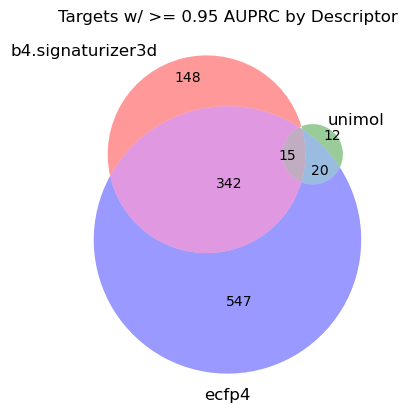

In [14]:
plt.title("Targets w/ >= 0.95 AUPRC by Descriptor")


venn = venn3(
    [
        target_sets[descriptors[0]],
        target_sets[descriptors[3]],
        target_sets[descriptors[4]],
    ],
    (descriptors[0], descriptors[3], descriptors[4]),
)

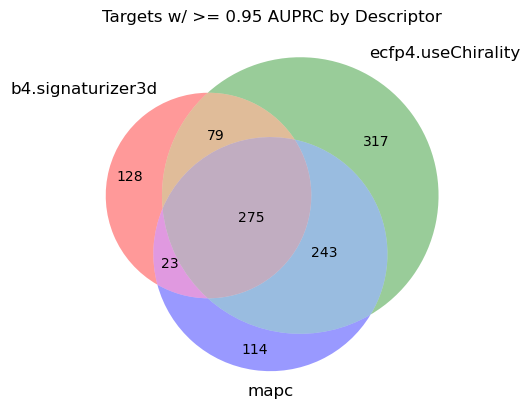

In [15]:
venn = venn3(
    [
        target_sets[descriptors[0]],
        target_sets[descriptors[5]],
        target_sets[descriptors[6]],
    ],
    (descriptors[0], descriptors[5], descriptors[6]),
)


# Add title
plt.title("Targets w/ >= 0.95 AUPRC by Descriptor")

# Show plot
plt.show()